In [28]:
import pandas as pd

In [29]:
General = pd.read_csv("GENERAL.csv")

In [30]:
General.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [31]:
General['CREDIT_LIMIT'].fillna(General['CREDIT_LIMIT'].mean(), inplace=True)

In [32]:
General['MINIMUM_PAYMENTS'].fillna(General['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [33]:
General =General.drop('CUST_ID', axis=1)

In [34]:
General =General.drop('TENURE', axis=1)

In [35]:
General.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

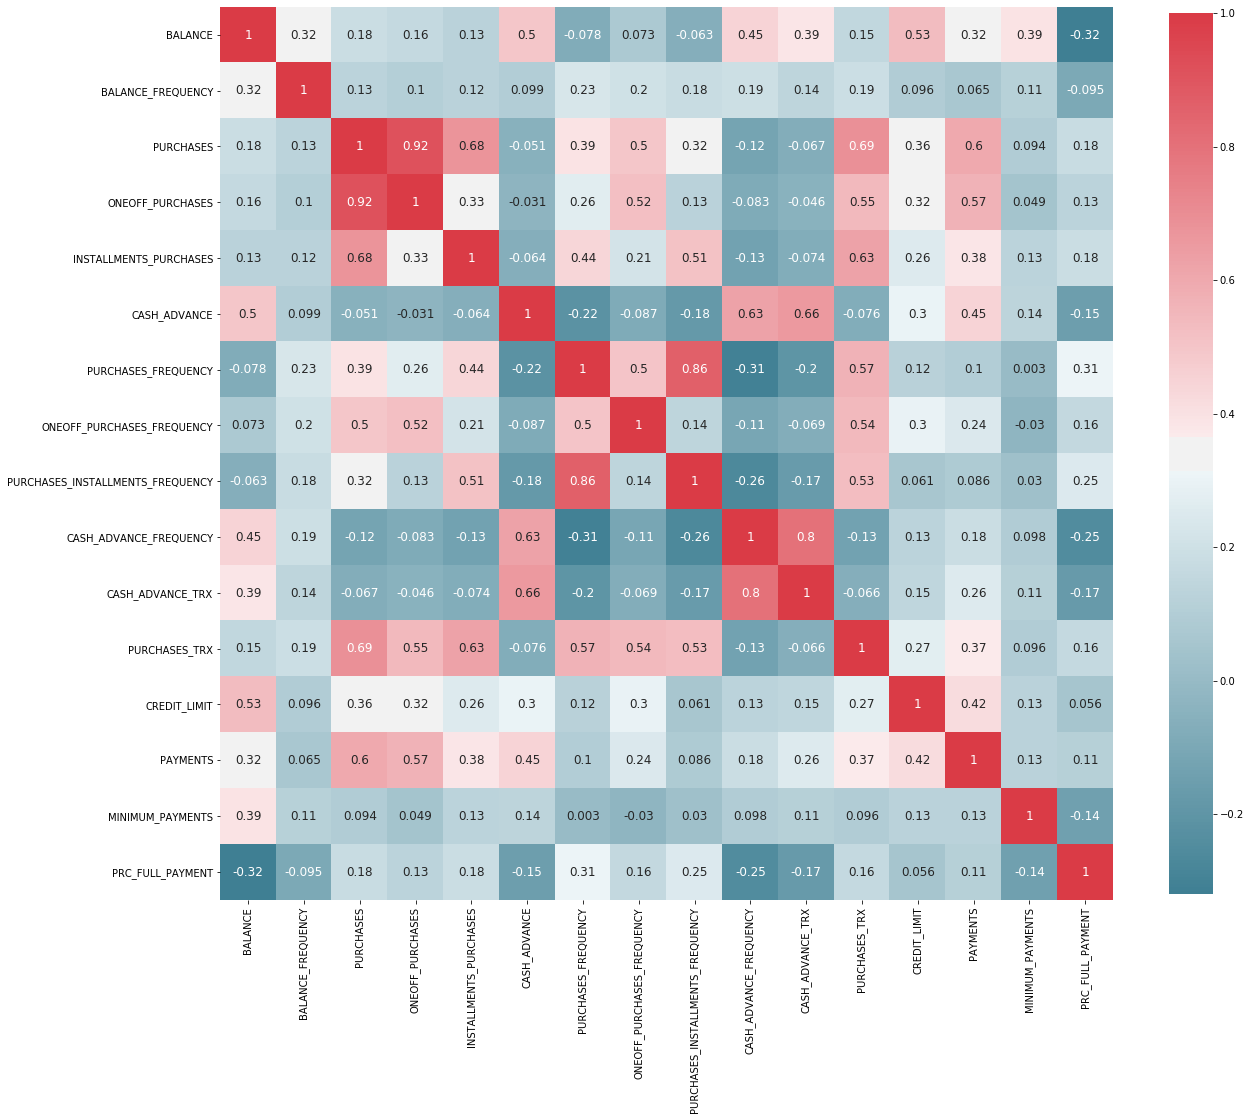

In [37]:
corr = General.corr()

s , ax = plt.subplots( figsize =( 20 , 18 ) )

cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

In [38]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=8, affinity = 'euclidean',linkage = 'complete')
clust_labels = model.fit_predict(General)

In [39]:
agglomerative = pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,1
2,1
3,1
4,1
...,...
8945,1
8946,1
8947,1
8948,1


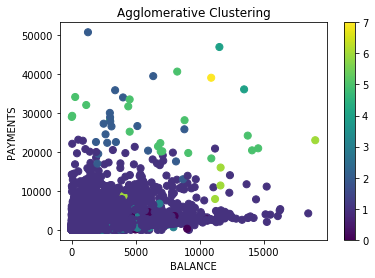

In [61]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax= fig.add_subplot(111)
scatter = ax.scatter(General['BALANCE'], General['PAYMENTS'], c=agglomerative[0], s=50)
ax.set_title ('Agglomerative Clustering')
ax.set_xlabel('BALANCE')
ax.set_ylabel('PAYMENTS')
plt.colorbar(scatter)

In [62]:
from sklearn.cluster import KMeans

In [63]:
Sum_of_squared_distances = []
K = range(1,20) #Comment connaitre l'étendu du range
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(General)
    Sum_of_squared_distances.append(km.inertia_)

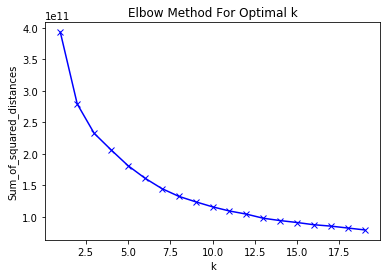

In [64]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [65]:
kmeans= KMeans(n_clusters=8, random_state=0)
kmeans.fit(General)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [66]:
labels= pd.DataFrame (kmeans.labels_)
labels

,0
0,1
1,7
2,3
3,3
4,1
...,...
8945,1
8946,1
8947,1
8948,1


In [67]:
kmeans.predict(General)
print(kmeans.cluster_centers_)

[[2.35499578e+03 9.68295883e-01 6.53938437e+03 4.40687639e+03
  2.13426751e+03 5.25803026e+02 9.10533493e-01 7.00182176e-01
  7.00894595e-01 6.99590997e-02 1.87683284e+00 7.34604106e+01
  8.00982405e+03 6.51252158e+03 1.18044413e+03 3.20485510e-01]
 [7.82320065e+02 8.50332119e-01 4.98717578e+02 2.41033090e+02
  2.57986455e+02 4.41997229e+02 4.51603614e-01 1.29520380e-01
  3.47547865e-01 1.07401041e-01 2.19030349e+00 9.37411720e+00
  2.12213813e+03 8.59572140e+02 5.44800317e+02 1.43843094e-01]
 [5.60230716e+03 9.43823703e-01 1.60264441e+03 9.73815793e+02
  6.28976079e+02 2.09526134e+03 5.61221797e-01 3.29430297e-01
  4.06951687e-01 2.15440176e-01 5.40748899e+00 2.31674009e+01
  1.35252203e+04 2.57098369e+03 1.77435367e+03 1.16952088e-01]
 [8.88959982e+02 8.71690680e-01 1.19592790e+03 6.96816071e+02
  4.99334871e+02 2.24305534e+02 6.19383358e-01 3.30890203e-01
  4.29166642e-01 4.92735164e-02 9.26229508e-01 1.89297424e+01
  6.98535501e+03 1.40644554e+03 3.63766321e+02 2.35681533e-01]
 [5.

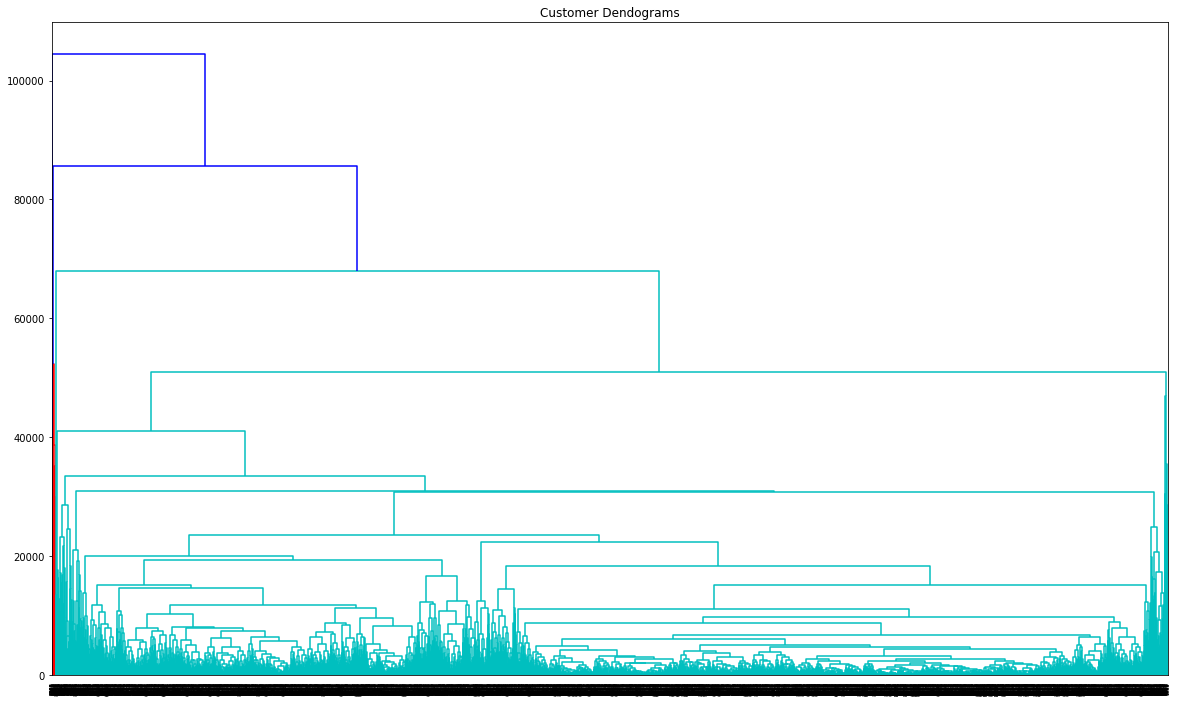

In [68]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,12))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(General, method="complete"))

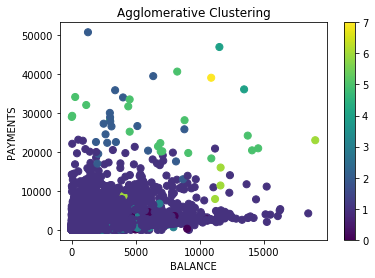

In [69]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax= fig.add_subplot(111)
scatter = ax.scatter(General['BALANCE'], General['PAYMENTS'], c=agglomerative[0], s=50)
ax.set_title ('Agglomerative Clustering')
ax.set_xlabel('BALANCE')
ax.set_ylabel('PAYMENTS')
plt.colorbar(scatter)

According to the plots the 2 results are same